In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("addedLane_1323813414.avi_image0.png")
glare = cv2.imread("glare.png", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

glare_alpha = glare[:, :, 3]
glare_alpha = np.reshape(glare_alpha, (glare_alpha.shape[0], glare_alpha.shape[1], 1))
# convert glare to 4 color grayscale
glare = cv2.cvtColor(glare, cv2.COLOR_BGR2GRAY)
glare = cv2.cvtColor(glare, cv2.COLOR_GRAY2RGB)

print(glare.shape)
print(glare_alpha.shape)
glare = np.concatenate((glare, glare_alpha), axis=2)

zeros_img = np.full((img.shape[0], img.shape[1], 1), fill_value = 255, dtype=np.uint8)
img = np.concatenate((img, zeros_img), axis=2)

(1014, 1184, 3)
(1014, 1184, 1)


In [3]:
def display_img(image):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image)
    ax.xaxis.tick_top()

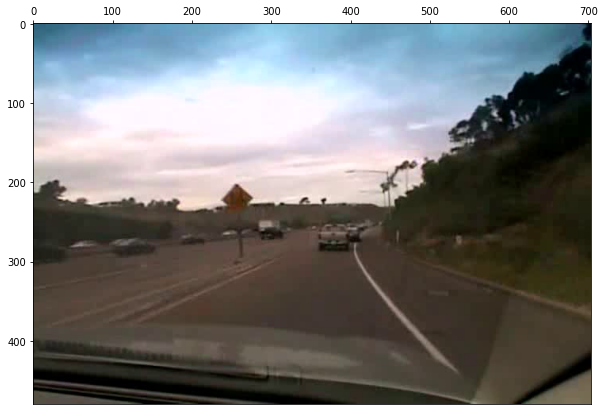

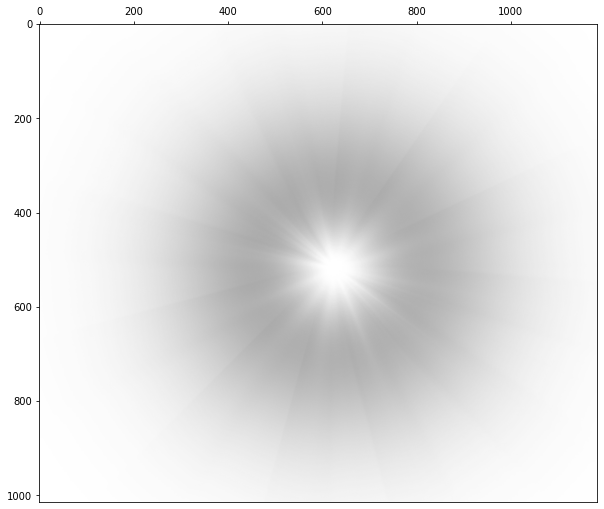

In [4]:
display_img(img)
display_img(glare)

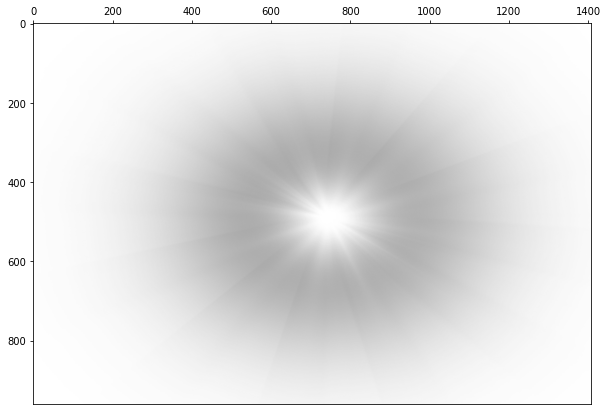

In [5]:
glare = cv2.resize(glare, (img.shape[1]*2, img.shape[0]*2))
display_img(glare)

120 346


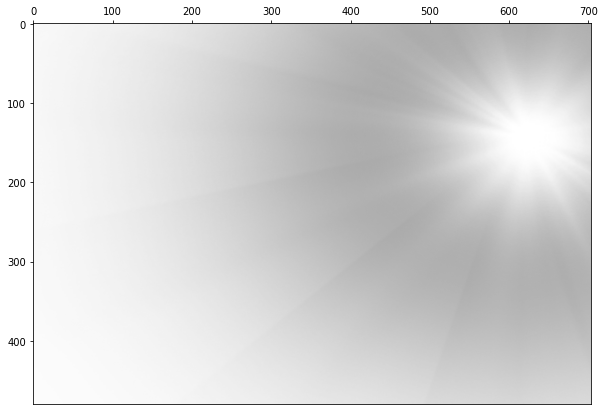

In [6]:
tx = np.random.randint(0, img.shape[1])
ty = np.random.randint(img.shape[0]/2, img.shape[0])
# tx = int(0)
# ty = int(img.shape[0])
print(tx, ty)

# Crop glare to match the size of the image with the corners at random locations
glare = glare[ty:ty+img.shape[0], tx:tx+img.shape[1]]
display_img(glare)

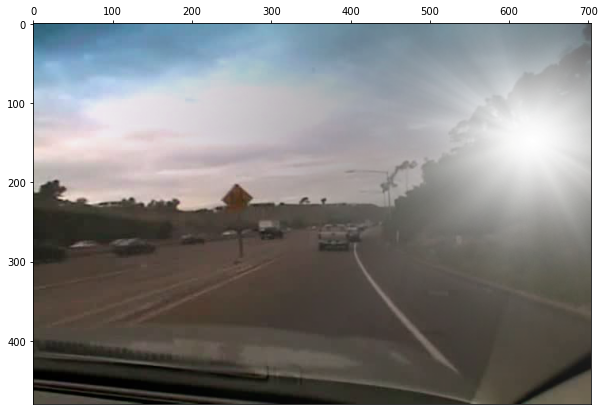

In [7]:
background = img.copy()
foreground = glare.copy()
gamma = 1

alpha_background = background[:, :, 3] / 255.0
alpha_foreground = gamma * foreground[:, :, 3] / 255.0

for color in range(3):
    background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
    alpha_background * background[:,:,color] * (1 - alpha_foreground)

background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255
display_img(background)

In [8]:
gamma2 = 0.6
new_img = cv2.addWeighted(img, 1, glare, gamma2, 0)

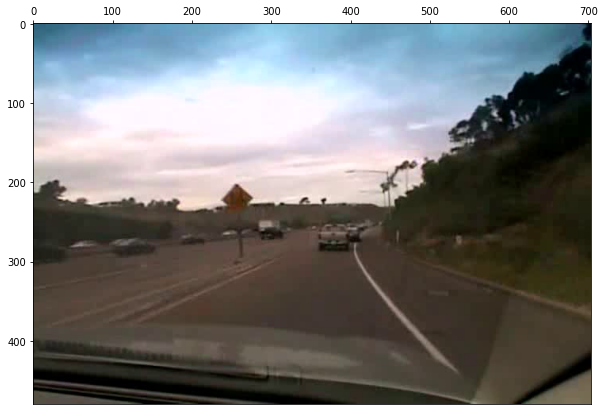

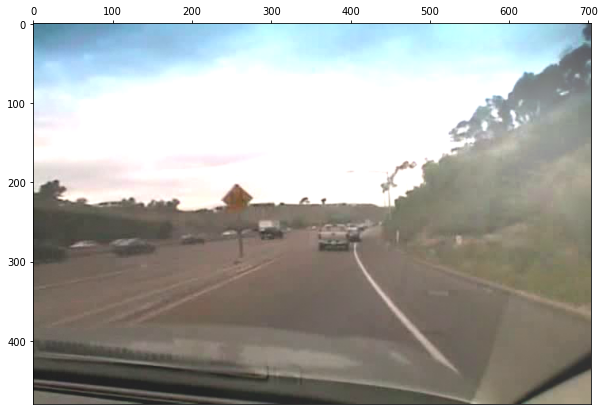

In [9]:
display_img(img)
display_img(new_img)

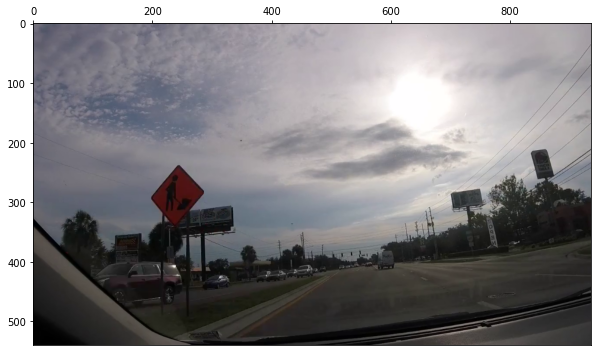

In [10]:
natural = cv2.imread("natural_glare.png")
natural = cv2.cvtColor(natural, cv2.COLOR_BGR2RGB)
display_img(natural)

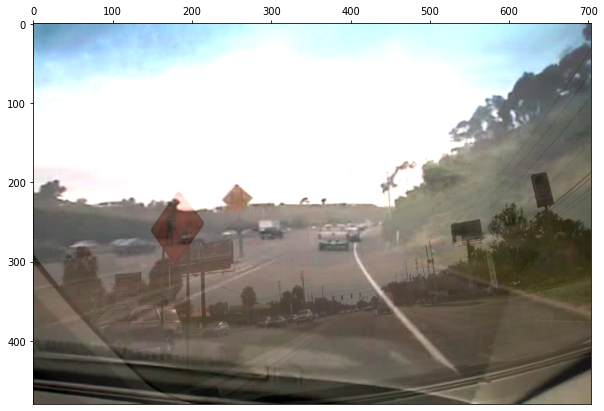

In [11]:

natural = cv2.resize(natural, (img[:,:,:3].shape[1], img[:,:,:3].shape[0]))

natural_img = cv2.addWeighted(img[:,:,:3], 1, natural, 0.5, 0)
display_img(natural_img)

In [12]:
def msed(img1, img2):
    return np.mean((img1 - img2) ** 2)

In [13]:
# MSE between original and added glare
print(msed(img[:,:,:3], new_img[:,:,:3]))

# MSE between original and original
print(msed(img[:,:,:3], img[:,:,:3]))

111.78325836489898
0.0


In [14]:
glare2 = cv2.imread("glare2.png", cv2.IMREAD_UNCHANGED)

In [15]:
glare3 = cv2.imread("glare3.png", cv2.IMREAD_UNCHANGED)

In [16]:
glare4 = cv2.imread("glare4.png", cv2.IMREAD_UNCHANGED)

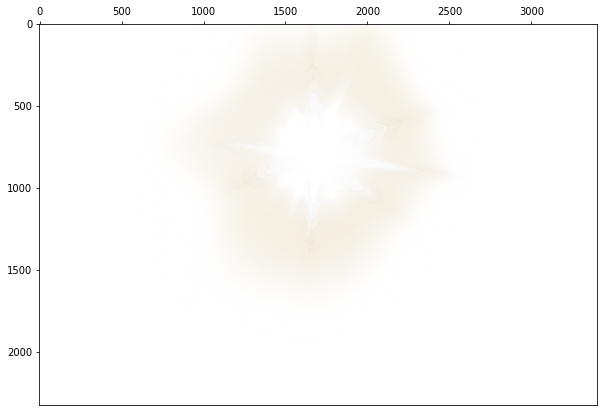

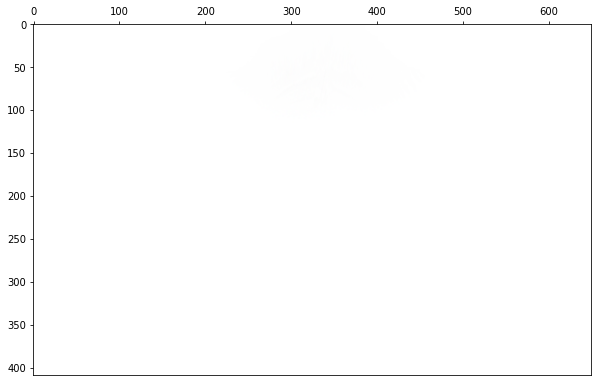

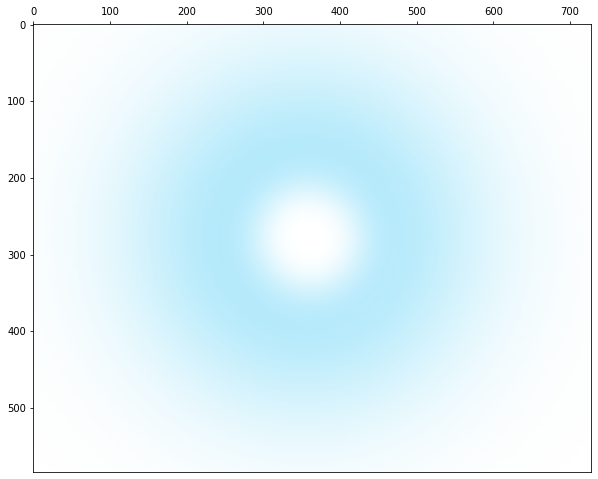

In [17]:
display_img(glare2)
display_img(glare3)
display_img(glare4)